In [1]:
import csv
import numpy as np
from sklearn import linear_model

test_size = 2500
count = 0

test_go_2 = []
test_go_4 = []
test_go_6 = []
test_go_8 = []
test_go_0 = []
test_xp_2 = []
test_xp_4 = []
test_xp_6 = []
test_xp_8 = []
test_xp_0 = []
test_label = []
train_go_2 = []
train_go_4 = []
train_go_6 = []
train_go_8 = []
train_go_0 = []
train_xp_2 = []
train_xp_4 = []
train_xp_6 = []
train_xp_8 = []
train_xp_0 = []
train_label = []

with open('pergold1.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if count>test_size:
            train_go_2.append(float(row['rg2']))
            train_go_4.append(float(row['rg4']))
            train_go_6.append(float(row['rg6']))
            train_go_8.append(float(row['rg8']))
            train_go_0.append(float(row['rg10']))
            train_xp_2.append(float(row['rx2']))
            train_xp_4.append(float(row['rx4']))
            train_xp_6.append(float(row['rx6']))
            train_xp_8.append(float(row['rx8']))
            train_xp_0.append(float(row['rx10']))
            train_label.append(float(row['rwin']))
        else:
            test_go_2.append(float(row['rg2']))
            test_go_4.append(float(row['rg4']))
            test_go_6.append(float(row['rg6']))
            test_go_8.append(float(row['rg8']))
            test_go_0.append(float(row['rg10']))
            test_xp_2.append(float(row['rx2']))
            test_xp_4.append(float(row['rx4']))
            test_xp_6.append(float(row['rx6']))
            test_xp_8.append(float(row['rx8']))
            test_xp_0.append(float(row['rx10']))
            test_label.append(float(row['rwin']))
        count += 1

test_go_2 = np.expand_dims(np.asarray(test_go_2), 1)
test_go_4 = np.expand_dims(np.asarray(test_go_4), 1)
test_go_6 = np.expand_dims(np.asarray(test_go_6), 1)
test_go_8 = np.expand_dims(np.asarray(test_go_8), 1)
test_go_0 = np.expand_dims(np.asarray(test_go_0), 1)
test_xp_2 = np.expand_dims(np.asarray(test_xp_2), 1)
test_xp_4 = np.expand_dims(np.asarray(test_xp_4), 1)
test_xp_6 = np.expand_dims(np.asarray(test_xp_6), 1)
test_xp_8 = np.expand_dims(np.asarray(test_xp_8), 1)
test_xp_0 = np.expand_dims(np.asarray(test_xp_0), 1)
train_go_2 = np.expand_dims(np.asarray(train_go_2), 1)
train_go_4 = np.expand_dims(np.asarray(train_go_4), 1)
train_go_6 = np.expand_dims(np.asarray(train_go_6), 1)
train_go_8 = np.expand_dims(np.asarray(train_go_8), 1)
train_go_0 = np.expand_dims(np.asarray(train_go_0), 1)
train_xp_2 = np.expand_dims(np.asarray(train_xp_2), 1)
train_xp_4 = np.expand_dims(np.asarray(train_xp_4), 1)
train_xp_6 = np.expand_dims(np.asarray(train_xp_6), 1)
train_xp_8 = np.expand_dims(np.asarray(train_xp_8), 1)
train_xp_0 = np.expand_dims(np.asarray(train_xp_0), 1)

# Logistic Regressor

using data gold at the end of match

In [2]:
LR = linear_model.LogisticRegression(C=1e5)
LR.fit(train_go_0, train_label)
prediction = LR.predict(test_go_0)

In [3]:
count = 0
for i in range(len(test_label)):
    if prediction[i]==test_label[i]:
        count += 1
        
print(count/len(test_label))

0.9480207916833266


In [4]:
import matplotlib.pyplot as plt

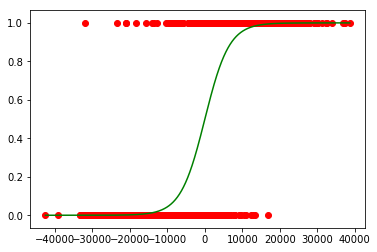

In [23]:
plt.scatter(test_go_0, test_label, color='red')
X = np.expand_dims(np.arange(min(test_go_0), max(test_go_0), 1), 1)
Y = LR.predict_proba(X)
plt.plot(X, Y[:,1], color='green')
plt.show()

# MLPRegressor

In [62]:
from sklearn.neural_network import MLPRegressor

In [75]:
MLPR = MLPRegressor(hidden_layer_sizes=(512,256), activation='logistic')
MLPR.fit(train_go_0, train_label)
prediction = MLPR.predict(test_go_0)

In [76]:
count = 0
for i in range(len(test_label)):
    if np.abs(prediction[i]-test_label[i])<0.5:
        count += 1
        
print(count/len(test_label))

0.9480207916833266


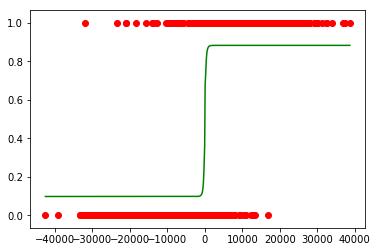

In [77]:
plt.scatter(test_go_0, test_label, color='red')
X = np.expand_dims(np.arange(min(test_go_0), max(test_go_0), 1), 1)
Y = MLPR.predict(X)
plt.plot(X, Y, color='green')
plt.show()

# Decision Tree Regressor

In [51]:
from sklearn import tree
TR = tree.DecisionTreeRegressor(max_depth=3)
TR.fit(train_go_0, train_label)
prediction = MLPR.predict(test_go_0)

In [52]:
count = 0
for i in range(len(test_label)):
    if np.abs(prediction[i]-test_label[i])<0.5:
        count += 1
        
print(count/len(test_label))

0.9480207916833266


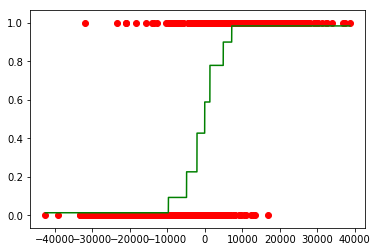

In [53]:
plt.scatter(test_go_0, test_label, color='red')
X = np.expand_dims(np.arange(min(test_go_0), max(test_go_0), 1), 1)
Y = TR.predict(X)
plt.plot(X, Y, color='green')
plt.show()

In [69]:
TR = tree.DecisionTreeRegressor(max_depth=100)
TR.fit(train_go_0, train_label)
prediction = MLPR.predict(test_go_0)

In [70]:
count = 0
for i in range(len(test_label)):
    if np.abs(prediction[i]-test_label[i])<0.5:
        count += 1
        
print(count/len(test_label))

0.9480207916833266


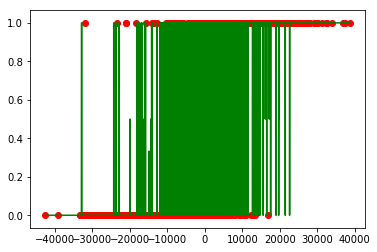

In [71]:
plt.scatter(test_go_0, test_label, color='red')
X = np.expand_dims(np.arange(min(test_go_0), max(test_go_0), 1), 1)
Y = TR.predict(X)
plt.plot(X, Y, color='green')
plt.show()

# SVM Regressor

In [41]:
from sklearn import svm

SR = svm.SVR()
SR.fit(train_go_0, train_label)
prediction = SR.predict(test_go_0)

In [43]:
count = 0
for i in range(len(test_label)):
    if np.abs(prediction[i]-test_label[i])<0.5:
        count += 1
        
print(count/len(test_label))

0.7197121151539384


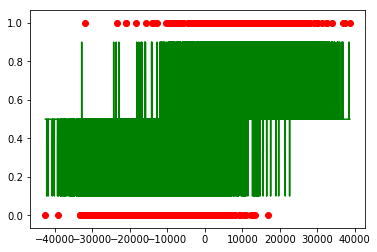

In [44]:
plt.scatter(test_go_0, test_label, color='red')
X = np.expand_dims(np.arange(min(test_go_0), max(test_go_0), 1), 1)
Y = SR.predict(X)
plt.plot(X, Y, color='green')
plt.show()